<a href="https://colab.research.google.com/github/devianbp/Analisis-Sentimen-dengan-Metode-LSTM/blob/master/LstmTubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Twitter Auth Token

##twitter_auth_token = ''

In [ ]:
# Import required Python package
##!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
##!sudo apt-get update
##!sudo apt-get install -y ca-certificates curl gnupg
##!sudo mkdir -p /etc/apt/keyrings
##!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

##!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

##!sudo apt-get update
##!sudo apt-get install nodejs -y

##!node -v

In [ ]:
# Crawl Data

##filename = 'film.csv'
##search_keyword = 'How to Make Millions Before Grandma Dies lang:id'
##limit = 300

##!npx --yes tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

In [ ]:
##import pandas as pd

# Specify the path to your CSV file
##file_path = f"tweets-data/{filename}"
##tweets = pd.read_csv(file_path)

# Read the CSV file into a pandas DataFrame
##df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
##display(df)

In [ ]:
# Cek jumlah data yang didapatkan

#num_tweets = len(df)
#print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

In [1]:

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [2]:
import preprocessor as p
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [3]:
from tweepy import OAuthHandler
import tweepy
import csv
import pandas as pd
import numpy as np

In [4]:
tweet = pd.read_csv('msibTubes.csv')

In [5]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1396 non-null   object 
 1   created_at               1396 non-null   object 
 2   favorite_count           1395 non-null   float64
 3   full_text                1396 non-null   object 
 4   id_str                   1395 non-null   object 
 5   image_url                581 non-null    object 
 6   in_reply_to_screen_name  413 non-null    object 
 7   lang                     1395 non-null   object 
 8   location                 959 non-null    object 
 9   quote_count              1395 non-null   object 
 10  reply_count              1395 non-null   float64
 11  retweet_count            1395 non-null   object 
 12  tweet_url                1394 non-null   object 
 13  user_id_str              1394 non-null   float64
 14  username                

In [6]:
tweet.drop(['conversation_id_str', 'created_at', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str'], axis=1, inplace=True)


In [7]:
tweet.sample(n=5)

,full_text,username
957,Atas pencapaiannya Lolos Program Magang dan St...,HimaMPUNJ
64,@worksfess Nder kamu ga telat submit assignmen...,ambalruonx
254,@pacarnyaFuma @collegemenfess kan program kamp...,hwangsaurus
1197,Riset dan Teknologi (Ditjen Diktiristek) yakni...,BUMNMedanSigap
340,#Mahasiswa UBBG#Program Magang#Bekerja! Tiga m...,serambinews


In [8]:
tweet.isnull().sum()

full_text    0
username     2
dtype: int64

In [9]:
tweet['Text Case Folding'] = tweet['full_text'].str.lower()


print('Case Folding Result : \n')
print(tweet['Text Case Folding'].head(5))
print('\n\n\n')

Case Folding Result : 

0    tugas apa pun ayo asal jangan tugas video mana...
1    laporan msib lebih banyak daripada skripsi eug...
2    bagi yang membaca ini yuk berdiskusi tentang p...
3    kdg kalo lagi kesemsem sm org bawaan rasa bela...
4    @idextratime hah ini game? kualitas sama gerak...
Name: Text Case Folding, dtype: object






In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
import string
import re #regex library

# import word_tokenize
from nltk.tokenize import word_tokenize

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_singl_char)

# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

tweet['Text Tokenizing'] = tweet['Text Case Folding'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n')
print(tweet['Text Tokenizing'].head())
print('\n\n\n')

Tokenizing Result : 

0    [tugas, apa, pun, ayo, asal, jangan, tugas, vi...
1    [laporan, msib, lebih, banyak, daripada, skrip...
2    [bagi, yang, membaca, ini, yuk, berdiskusi, te...
3    [kdg, kalo, lagi, kesemsem, sm, org, bawaan, r...
4    [hah, ini, game, kualitas, sama, gerakannya, k...
Name: Text Tokenizing, dtype: object






In [13]:
normalizad_word = pd.read_excel("kamuskatabaku.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

tweet['Text Normalization'] = tweet['Text Tokenizing'].apply(normalized_term)

tweet['Text Normalization'].head()

0    [tugas, apa, pun, ayo, asal, jangan, tugas, vi...
1    [laporan, msib, lebih, banyak, daripada, skrip...
2    [bagi, yang, membaca, ini, yuk, berdiskusi, te...
3    [kadang, kalau, lagi, kesemsem, sama, orang, b...
4    [hah, ini, game, kualitas, sama, gerakannya, k...
Name: Text Normalization, dtype: object

In [14]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


In [15]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=311eb58db5a81579a57f15bcd2d406f3d87064cefc7721dbd61c1636d7b339ac
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [16]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweet['Text Normalization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet['Text Stemming'] = tweet['Text Normalization'].swifter.apply(get_stemmed_term)
print(tweet['Text Stemming'])

3145
------------------------
tugas : tugas
apa : apa
pun : pun
ayo : ayo
asal : asal
jangan : jangan
video : video
mana : mana
durasinya : durasi
menit : menit
sedangkan : sedang
materi : materi
gue : gue
dikit : dikit
harus : harus
mengomong : omong
lagi : lagi
laporan : lapor
msib : msib
lebih : lebih
banyak : banyak
daripada : daripada
skripsi : skripsi
euggg : euggg
ughhh : ughhh
bagi : bagi
yang : yang
membaca : baca
ini : ini
yuk : yuk
berdiskusi : diskus
tentang : tentang
pandangan : pandang
kalian : kalian
seputar : putar
perkualiahan : perkualiahan
organisasi : organisasi
dunia : dunia
kerja : kerja
dll : dll
tulis : tulis
dibawa : bawa
ya : ya
kalaupun : kalaupun
diluar : luar
itu : itu
its : its
okeey : okeey
asalkan : asal
kita : kita
bisa : bisa
kadang : kadang
kalau : kalau
kesemsem : semsem
sama : sama
orang : orang
bawaan : bawa
rasa : rasa
belajar : ajar
tinggi : tinggi
sok : sok
di : di
manfaatkan : manfaat
dengan : dengan
baik : baik
momen : momen
kayak : kayak
begi

Pandas Apply:   0%|          | 0/1396 [00:00<?, ?it/s]

0       [tugas, apa, pun, ayo, asal, jangan, tugas, vi...
1       [lapor, msib, lebih, banyak, daripada, skripsi...
2       [bagi, yang, baca, ini, yuk, diskus, tentang, ...
3       [kadang, kalau, lagi, semsem, sama, orang, baw...
4       [hah, ini, game, kualitas, sama, gera, kayak, ...
                              ...                        
1391         [magang, dan, studi, independen, sertifikat]
1392    [djohar, kait, magang, dan, studi, independen,...
1393    [program, magang, dan, studi, independen, sert...
1394    [info, adkesma, sosialisasi, msib, program, mi...
1395    [daftar, magang, dan, studi, independen, serti...
Name: Text Stemming, Length: 1396, dtype: object


In [17]:
pip install nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'sdgkan', 'sdg', 'emg', 'sm', 'pls', 'mlu', 'ken',
                       'allah', 'brb', 'btw', 'b/c', 'cod', 'cmiiw', 'fyi',
                       'gg', 'ggwp', 'idk', 'ikr', 'lol', 'ootd', 'lmao', 'oot',
                       'pap', 'otw', 'tfl', 'vc', 'ygy'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwordbahasa.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweet['Text Filtering'] = tweet['Text Stemming'].apply(stopwords_removal)


print(tweet['Text Filtering'].head())

0    [tugas, ayo, tugas, video, durasi, menit, mate...
1                 [lapor, msib, skripsi, euggg, ughhh]
2    [baca, yuk, diskus, pandang, putar, perkualiah...
3    [kadang, semsem, orang, bawa, ajar, sok, manfa...
4     [hah, game, kualitas, gera, kayak, game, bzirrr]
Name: Text Filtering, dtype: object


In [20]:
tweet.head()

,full_text,username,Text Case Folding,Text Tokenizing,Text Normalization,Text Stemming,Text Filtering
0,Tugas apa pun ayo asal jangan tugas video mana...,lotsobeartuu,tugas apa pun ayo asal jangan tugas video mana...,"[tugas, apa, pun, ayo, asal, jangan, tugas, vi...","[tugas, apa, pun, ayo, asal, jangan, tugas, vi...","[tugas, apa, pun, ayo, asal, jangan, tugas, vi...","[tugas, ayo, tugas, video, durasi, menit, mate..."
1,laporan msib lebih banyak daripada skripsi eug...,pwettycaindeed,laporan msib lebih banyak daripada skripsi eug...,"[laporan, msib, lebih, banyak, daripada, skrip...","[laporan, msib, lebih, banyak, daripada, skrip...","[lapor, msib, lebih, banyak, daripada, skripsi...","[lapor, msib, skripsi, euggg, ughhh]"
2,Bagi yang membaca ini yuk berdiskusi tentang p...,jundumufakkirul,bagi yang membaca ini yuk berdiskusi tentang p...,"[bagi, yang, membaca, ini, yuk, berdiskusi, te...","[bagi, yang, membaca, ini, yuk, berdiskusi, te...","[bagi, yang, baca, ini, yuk, diskus, tentang, ...","[baca, yuk, diskus, pandang, putar, perkualiah..."
3,Kdg kalo lagi kesemsem sm org bawaan rasa bela...,uffaaffu,kdg kalo lagi kesemsem sm org bawaan rasa bela...,"[kdg, kalo, lagi, kesemsem, sm, org, bawaan, r...","[kadang, kalau, lagi, kesemsem, sama, orang, b...","[kadang, kalau, lagi, semsem, sama, orang, baw...","[kadang, semsem, orang, bawa, ajar, sok, manfa..."
4,@idextratime Hah ini game? Kualitas sama gerak...,dekisbeliardd,hah ini game kualitas sama gerakannya kek game...,"[hah, ini, game, kualitas, sama, gerakannya, k...","[hah, ini, game, kualitas, sama, gerakannya, k...","[hah, ini, game, kualitas, sama, gera, kayak, ...","[hah, game, kualitas, gera, kayak, game, bzirrr]"


In [21]:
tweet.to_csv("preprocessing results", index=False)

In [22]:
df= tweet.drop(columns=['full_text', 'Text Case Folding', 'Text Tokenizing', 'Text Normalization', 'Text Stemming'])
df.head()

,username,Text Filtering
0,lotsobeartuu,"[tugas, ayo, tugas, video, durasi, menit, mate..."
1,pwettycaindeed,"[lapor, msib, skripsi, euggg, ughhh]"
2,jundumufakkirul,"[baca, yuk, diskus, pandang, putar, perkualiah..."
3,uffaaffu,"[kadang, semsem, orang, bawa, ajar, sok, manfa..."
4,dekisbeliardd,"[hah, game, kualitas, gera, kayak, game, bzirrr]"


In [23]:
lexicon_positive = pd.read_excel('kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in text:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'Positive'

    else:
        sentimen = 'Negative'
    return score, sentimen

results = df['Text Filtering'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['Polarity Score'] = results[0]
df['Indonesia Sentiment'] = results[1]


#data['sentimen'] = results[1]
#data

df[['Text Filtering','Polarity Score','Indonesia Sentiment']]

,Text Filtering,Polarity Score,Indonesia Sentiment
0,"[tugas, ayo, tugas, video, durasi, menit, mate...",-6,Negative
1,"[lapor, msib, skripsi, euggg, ughhh]",2,Positive
2,"[baca, yuk, diskus, pandang, putar, perkualiah...",11,Positive
3,"[kadang, semsem, orang, bawa, ajar, sok, manfa...",5,Positive
4,"[hah, game, kualitas, gera, kayak, game, bzirrr]",5,Positive
...,...,...,...
1391,"[magang, studi, independen, sertifikat]",4,Positive
1392,"[djohar, kait, magang, studi, independen, sert...",17,Positive
1393,"[program, magang, studi, independen, sertifika...",4,Positive
1394,"[info, adkesma, sosialisasi, msib, program, mi...",5,Positive


In [24]:
inset_counts = df['Indonesia Sentiment'].value_counts()
inset_counts

Indonesia Sentiment
Positive    886
Negative    510
Name: count, dtype: int64

In [25]:
df.to_csv("sentiment results", index=False)

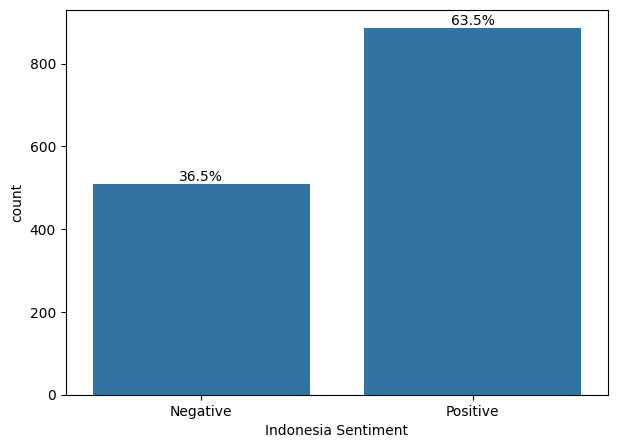

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5));
g = sns.countplot(x='Indonesia Sentiment', data=df)

ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
         textcoords='offset points')

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv("sentiment results")

df

,username,Text Filtering,Polarity Score,Indonesia Sentiment
0,lotsobeartuu,"['tugas', 'ayo', 'tugas', 'video', 'durasi', '...",-6,Negative
1,pwettycaindeed,"['lapor', 'msib', 'skripsi', 'euggg', 'ughhh']",2,Positive
2,jundumufakkirul,"['baca', 'yuk', 'diskus', 'pandang', 'putar', ...",11,Positive
3,uffaaffu,"['kadang', 'semsem', 'orang', 'bawa', 'ajar', ...",5,Positive
4,dekisbeliardd,"['hah', 'game', 'kualitas', 'gera', 'kayak', '...",5,Positive
...,...,...,...,...
1391,slitenja,"['magang', 'studi', 'independen', 'sertifikat']",4,Positive
1392,WikiDPR3,"['djohar', 'kait', 'magang', 'studi', 'indepen...",17,Positive
1393,kompascom,"['program', 'magang', 'studi', 'independen', '...",4,Positive
1394,bemfhunsoed,"['info', 'adkesma', 'sosialisasi', 'msib', 'pr...",5,Positive


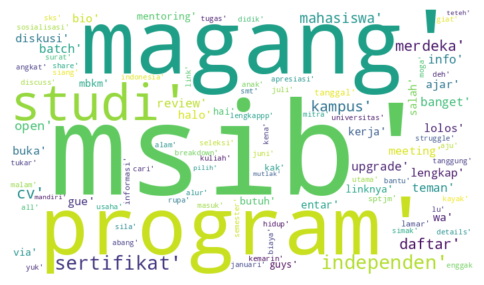

In [28]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Negative']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

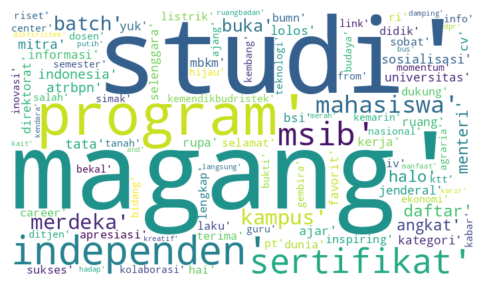

In [29]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Positive']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

df_inset = pd.read_csv("sentiment results")

df_inset

,username,text,text_clean,polarity,sentiment,sentiment_label,Text Filtering,Polarity Score,Indonesia Sentiment
0,bemfhuns,best presentasi best paper lomba karya tulis i...,best presentasi best paper lomba karya tuli il...,1.0,Positive,2,"['best', 'presentasi', 'best', 'paper', 'lomba...",-3,Negative
1,suarantbcom,nurul istikomah mahasiswa unram raih pengharga...,nurul istikomah mahasiswa unram raih pengharga...,1.0,Positive,2,"['nurul', 'istikomah', 'mahasiswa', 'unram', '...",5,Positive
2,agus_santhosa,bersama dr stella dir psga unram sederhana set...,dr stella dir psga unram sederhana bertemu yg ...,0.8,Positive,2,"['stella', 'dir', 'psga', 'unram', 'sederhana'...",0,Negative
3,NaN,yuk kenalin beasiswa bright scholarship unram amp,yuk kenalin beasiswa bright scholarship unram amp,0.7,Positive,2,"['yuk', 'kenal', 'beasiswa', 'bright', 'schola...",5,Positive
4,twitmadelle,aku utbk tanggal sesi pagi jam pengen banget i...,utbk tanggal sesi pagi jam pengen banget jalan...,0.7,Positive,2,"['utbk', 'tanggal', 'sesi', 'pagi', 'jam', 'pe...",-15,Negative
...,...,...,...,...,...,...,...,...,...
1023,KejariMataram,pada hari rabu tanggal agustus bertempat di au...,rabu tanggal agustu bertempat aula kejaksaan n...,0.0,Neutral,1,"['rabu', 'tanggal', 'agustus', 'aula', 'jaksa'...",-2,Negative
1024,um_mataram,alhamdulillah telah dibuka program studi s man...,alhamdulillah dibuka program studi s manajemen...,0.0,Neutral,1,"['alhamdulillah', 'buka', 'program', 'studi', ...",7,Positive
1025,pradiptha_putra,penguatan kompetensi melalui pembekalan pelati...,penguatan kompetensi pembekalan pelatihan kerj...,0.0,Neutral,1,"['kuat', 'kompetensi', 'bekal', 'latih', 'kerj...",17,Positive
1026,bpsilhkmataram,dalam pengembangan jenis bioprospektif acara t...,pengembangan jeni bioprospektif acara dihadiri...,0.0,Neutral,1,"['kembang', 'jenis', 'bioprospektif', 'acara',...",-1,Negative


## **COBA LSTM**

In [ ]:
data = pd.read_csv("sentiment results")
data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 42)
print("Training data size : ", train_data.shape)
print("Test data size : ", test_data.shape)

In [ ]:
top_words = 10000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(train_data['Text Filtering'])
list_tokenized_train = tokenizer.texts_to_sequences(train_data['Text Filtering'])

max_review_length = 200
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
y_train = train_data[' Score']

In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
new_var = model.fit(X_train,y_train, epochs=20, batch_size=64, validation_split=0.2)

In [ ]:
list_tokenized_test = tokenizer.texts_to_sequences(test_data['Text Filtering'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_data[' Score']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
y_pred = (prediction > 0.5)
y_pred = y_pred.astype(int)
y_pred[y_pred == 1] = 1
y_pred[y_pred == 0] = 0
print('F1-score: ', f1_score(y_test, y_pred, average='weighted'))

print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

# CODE BERAJAH

In [ ]:
data = pd.read_csv("sentiment results1")

In [ ]:
X = data.loc[:, 'Text Filtering'].values
Y = data.loc[:, ' Score'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Training data: ")
print(X_train.shape)
print(y_train.shape)

In [ ]:
tokenizer_obj = Tokenizer()
#total_reviews = X_train + X_test
total_reviews=X
tokenizer_obj.fit_on_texts(total_reviews)

# pad sequences
max_length = 100 # try other options like mean
# define vocabulary size
vocab_size = len(tokenizer_obj.word_index) + 1

X_train_tokens =  tokenizer_obj.texts_to_sequences(X_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(X_test)


X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

In [ ]:
print(vocab_size, X_train_pad[0])

In [ ]:
df_inset = pd.read_csv("sentiment results")

In [ ]:
text = df['Text Filtering'] #extracting the reviews
label = df['Text Filtering']

In [ ]:
#80% train, 10% test & 10% validation
split_frac = 0.8
len_feat = len(df)
train_x = df[0:int(split_frac*len_feat)]
train_y = label[0:int(split_frac*len_feat)]
remaining_x = df[int(split_frac*len_feat):]
remaining_y = label[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [ ]:
import pandas as pd
import numpy as np

# Assuming train_x, valid_x, test_x, train_y, valid_y, test_y are your DataFrames
train_x = train_x.values
valid_x = valid_x.values
test_x = test_x.values
train_y = train_y.values
valid_y = valid_y.values
test_y = test_y.values

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))


In [ ]:

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

batch_size = 64

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size,drop_last=True)

In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim).to(device)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,dropout=drop_prob, batch_first=True)
        # dropout layer
        self.dropout = nn.Dropout(0.3).to(device)

        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size).to(device)
        self.sig = nn.Sigmoid().to(device)


    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden


    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).normal_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).normal_().to(device))

        return hidden

In [ ]:
def train(train_loader,valid_loader,epochs,model_type):
  if model_type == "LSTM":
    net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers).to(device)
  elif (model_type == "GRU"):
    net = GRU(vocab_size, output_size, embedding_dim, hidden_dim, n_layers).to(device)
  lr=0.001
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)


  counter = 0
  print_every = 100
  clip=5 # gradient clipping
  net.train()
  # train for some number of epochs
  for e in range(epochs):
      # initialize hidden state
      h = net.init_hidden(batch_size)

      # batch loop
      for inputs, labels in train_loader:
          counter += 1

          inputs, labels = inputs.to(device), labels.to(device)
          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          if model_type == "GRU":
            h = h.data.to(device)
          elif model_type == "LSTM":
            h = tuple([each.data.to(device) for each in h])
          # zero accumulated gradients
          net.zero_grad()

          # get the output from the model
          inputs = inputs.type(torch.LongTensor).to(device)
          output, h = net(inputs, h)
          #print(output[0])
          # calculate the loss and perform backprop
          #print("shape of output", output.shape)
          #print("shape of labels", labels.shape)
          loss = criterion(output.squeeze(), labels.float())
          loss.backward()
          # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
          nn.utils.clip_grad_norm_(net.parameters(), clip)
          optimizer.step()

          # loss stats
          if counter % print_every == 0:
              # Get validation loss
              val_h = net.init_hidden(batch_size)
              val_losses = []
              net.eval()
              for inputs, labels in valid_loader:

                  # Creating new variables for the hidden state, otherwise
                  # we'd backprop through the entire training history
                  if model_type == "GRU":
                    val_h = val_h.data.to(device)
                  elif (model_type == "LSTM"):
                    val_h = tuple([each.data.to(device) for each in val_h])

                  inputs, labels = inputs.to(device), labels.to(device)

                  inputs = inputs.type(torch.LongTensor).to(device)
                  output, val_h = net(inputs, val_h)
                  val_loss = criterion(output.squeeze(), labels.float())

                  val_losses.append(val_loss.item())

              net.train()
              print("Epoch: {}/{}...".format(e+1, epochs),
                    "Model:{}...".format(model_type),
                    "Step: {}...".format(counter),
                    "Loss: {:.6f}...".format(loss.item()),
                    "Val Loss: {:.6f}".format(np.mean(val_losses)))
  return net

In [ ]:
train_on_gpu = True

In [ ]:
def test(net,test_loader,model_type):

  # Get test data loss and accuracy
  lr=0.001
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)

  test_losses = [] # track loss
  num_correct = 0

  # init hidden state
  h = net.init_hidden(batch_size)

  net.eval()
  # iterate over test data
  for inputs, labels in test_loader:

      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      if model_type == "GRU":
        h = h.data.to(device)
      elif (model_type == "LSTM"):
        h = tuple([each.data.to(device) for each in h])

      inputs, labels = inputs.to(device), labels.to(device)

      # get predicted outputs
      inputs = inputs.type(torch.LongTensor).to(device)
      output, h = net(inputs, h)

      # calculate loss
      test_loss = criterion(output.squeeze(), labels.float())
      test_losses.append(test_loss.item())

      # convert output probabilities to predicted class (0 or 1)
      pred = torch.round(output.squeeze())  # rounds to the nearest integer

      # compare predictions to true label
      correct_tensor = pred.eq(labels.float().view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      num_correct += np.sum(correct)


  # -- stats! -- ##
  # avg test loss
  print("Model: {}".format(model_type))
  print("Test loss: {:.3f}".format(np.mean(test_losses)))

  # accuracy over all test data
  test_acc = num_correct/len(test_loader.dataset)
  print("Test accuracy: {:.3f}".format(test_acc))

In [ ]:
test(lstm,test_loader,model_type ="LSTM")